## 時系列Data を読み込んでみよう

In [39]:
# File一覧の取得
from glob import glob  # glob を import

files = glob('data/person_count_1sec/out_0001/*.csv')  # Data一覧を取得
files.sort()  # Data一覧を Sort
files[:5]  # 先頭５行を確認

['data/person_count_1sec/out_0001\\person_count_out_0001_2021011509.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011510.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011511.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011512.csv',
 'data/person_count_1sec/out_0001\\person_count_out_0001_2021011513.csv']

File名が「person_count_out_0001」までが共通で、その後ろは、「2021011509」となっており、2021年１月15日の９時代の Data であると考えられる。
まずは、最初の File だけを読み込んでみる

In [40]:
# 先頭Data の読み込み
import pandas as pd
from IPython.display import display

data = pd.read_csv(files[0])  # 先頭の File のみ読み込み
display(data.head(5))  # Data の先頭５行のみ表示
print(data.dtypes)  # 各列の Data型を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


receive_time に milli秒単位まで入っている。
※ IoT等の sensor data では milli秒単位まで出てくることが多い。
Data型が object型になっており、このままでは文字列情報としてか使用できないので datetime型に変換していく。

In [41]:
# datetime型への変換
data['receive_time'] = pd.to_datetime(data['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


datetime型は読み込み時にも指定できる。あらかしめ Data を確認し、datetime型で読み込みたい Column が決まっている場合は、読み込み時に指定するのが良い。

In [42]:
# datetime型を指定して読み込み
data = pd.read_csv(files[0], parse_dates=['receive_time'])  # datetime型で読み込む列を指定して読み込み
display(data.head())  # 先頭５行を表示
print(data.dtypes)  # 各列の Data型を確認

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


読み込み時に、receive_time列にdatetime型を指定して全File を読み込んでいく

In [43]:
# 全Data の読み込み
data = []  # List を準備
for f in files:
    tmp = pd.read_csv(f, parse_dates=['receive_time'])  # receive_time を datetime型で指定して読み込み
    data.append(tmp)  # List に Data を追加
data = pd.concat(data, ignore_index=True)  # Data を結合。ignore_index=True で index は結合毎にふりなおす
display(data.head())  # 先頭５行を表示
len(data)  # Data件数を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


2346162

## 日付の範囲を確認しよう

いつからいつの Data なのか開始日と終了日を取得して出力してみる。
分析対象がどの日付の範囲で、何日間の Data なのかを把握する必要がある

In [44]:
# 開始日、終了日の表示
min_receive_time = data['receive_time'].min()  # receive_time列の最小値を取得
max_receive_time = data['receive_time'].max()  # receive_time列の最大値を取得
print(min_receive_time)  # 最小値を表示
print(max_receive_time)  # 最大値を表示

2021-01-15 09:00:00.144000
2021-02-14 17:59:59.956000


In [45]:
# 期間の表示
print(data['receive_time'].max() - data['receive_time'].min())

30 days 08:59:59.812000


## 日毎の Data件数を確認しよう

日毎の Data件数を各員していく。
Sensor data のような場合
- 仕様的には１秒ごとに Data を取得している場合でも、ブレが生じることが多々ある。
- Sensor の故障等で、Data が欠損している場合がある。

上記の観点から、日単位程度でしっかりと把握しておく

In [46]:
# 日単位への変換
data['receive_date'] = data['receive_time'].dt.date  # Milli秒数単位の receive_time を日単位の Data に変換する
data.head()  # 先頭５行を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15


In [47]:
# 日別Data の集計
daily_count = data[['receive_date', 'id']].groupby('receive_date',
                                                   as_index=False).count()  # receive_date と id に絞り込み receive_date毎で集計
daily_count.head()  # 先頭５行を表示

,receive_date,id
0,2021-01-15,50166
1,2021-01-16,75699
2,2021-01-17,73198
3,2021-01-18,78365
4,2021-01-19,78348


2021年１月15日は、Data件数が少ない。おそらく開始時間が９時からであるのが影響していると思われる。
30日分を数字で見ていくのは厳しいため、棒Graph で可視化してみる

<AxesSubplot:xlabel='receive_date', ylabel='id'>

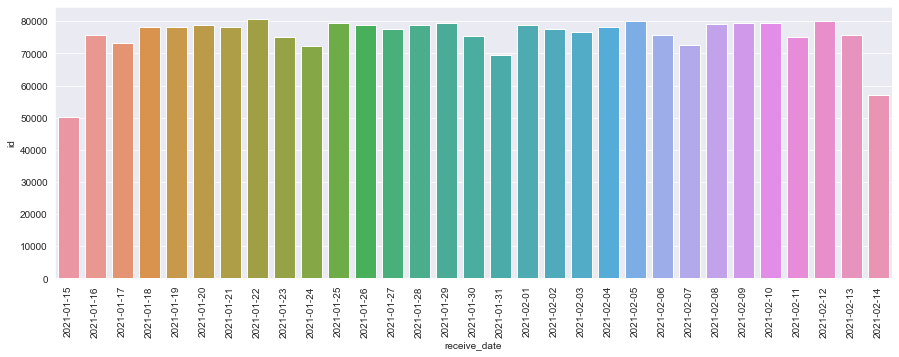

In [48]:
# 日別Data の棒Graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # Graph size を設定
plt.xticks(rotation=90)  # X軸の Label text を90度回転
sns.barplot(x=daily_count['receive_date'], y=daily_count['id'])  # 棒Graph を描画

基本的には７万件程度だが、１月23日、24日のように時々 Data件数が下がっている。
５日間７万件、２日間は下がるという規則性から曜日が関係しているのではないかと想像できる。曜日を取得してみる

## 日付から曜日を算出してみよう

In [49]:
# 曜日情報の取得
data['dayofweek'] = data['receive_time'].dt.dayofweek
data['day_name'] = data['receive_time'].dt.day_name()
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15,4,Friday
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15,4,Friday
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15,4,Friday
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15,4,Friday
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15,4,Friday


dt を利用して曜日を取得。
曜日を数字でとるか英語名でとるかは Case by case.
- 数字: Data が軽い。何番がどの曜日か不明。
- 英語名: 曜日が分かる。Data が重い

０番目が月曜日で、１番火曜日と増えていき、６番目が日曜日になる

どの日付が何曜日なのか確認しやすくするために日付単位の Data にしていく。
※ 集計すると英語名が対応できない為、重複削除することで対応する。

In [50]:
# 日単位での曜日表示
data[['receive_date', 'dayofweek', 'day_name']].drop_duplicates(subset='receive_date').head(
    10)  # drop_duplicates()で receive_date毎に unique になるように重複を削除し、Data の先頭10件を表示

,receive_date,dayofweek,day_name
0,2021-01-15,4,Friday
50166,2021-01-16,5,Saturday
125865,2021-01-17,6,Sunday
199063,2021-01-18,0,Monday
277428,2021-01-19,1,Tuesday
355776,2021-01-20,2,Wednesday
434668,2021-01-21,3,Thursday
513010,2021-01-22,4,Friday
593585,2021-01-23,5,Saturday
668686,2021-01-24,6,Sunday


前述の Data件数が下がっていた23日が土曜日、24日が日曜日であることがわかる。
細かい Data は Sensor の仕様等にもよるが、この Data は土日の Data件数が少なくなるということを頭にいれておく。

比較的 Data件数が近い値である１月20、21、22日の Data に絞り込んでいく

## 特定範囲の Dataに絞り込もう

In [51]:
# 日付による　Data の絞り込み
import datetime as dt

data_extract = data.loc[
    (data['receive_time'] >= dt.datetime(2021, 1, 20)) & (
            data['receive_time'] < dt.datetime(2021, 1, 23))].copy()  # 2021年1月20日から22日までの　Data を絞り込み

display(data_extract.head())  # 先頭５行を表示
display(data_extract.tail())  # 末尾５行を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday


,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593584,2624,1,2021-01-22 23:58:36.927,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday


## 秒単位の Data を作成しよう
Milli秒単位の Data を秒単位の Data に変えていく

In [52]:
# round による秒単位 Data の作成
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.round('S')  # round()の中に秒単位で丸めるということで 'S' を指定
data_extract  # 表示する

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:42
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:33
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:34
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:35
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday,2021-01-22 23:58:36


秒単位に丸めた際に、必ず重複がないか確認するべきである。

In [53]:
## 重複の確認
print(len(data_extract))
print(len(data_extract['receive_time_sec'].unique()))

237809
237807


２件 Data がズレているため、重複Data を確認していく。

In [54]:
# 重複Data の表示
data_extract[data_extract['receive_time_sec'].duplicated(
    keep=False)].head()  # duplicated()で重複しているかの　True | False を取得。keep=False を指定しないと重複Data の片方しか False にならない

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578874,887,1,2021-01-22 19:15:06.530,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08
578877,890,1,2021-01-22 19:15:08.424,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08


重複Data は、四捨五入していることに起因している様子。
そこで、 floor()で切り捨ても行なってみる。（※ 合わせて重複件数の Check も行なう。）

In [55]:
# floor による秒単位Data の作成
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.floor('S')  # dt.floor() で切り捨てを行なう
display(data_extract.head())  # 先頭５行の表示
print(len(data_extract))  # Data 件数を表示
print(len(data_extract['receive_time_sec'].unique()))  # receive_time_sec の一意性のある Data 件数を表示

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:40
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


237809
237808


重複件数は１件になった。
重複Data を確認していく。

In [56]:
# 重複Data の確認
data_extract[data_extract['receive_time_sec'].duplicated(
    keep=False)].head()  # duplicated()で重複しているかの　True | False を取得。keep=False を指定しないと重複Data の片方しか False にならない

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07


Sensor がおよそ100milli秒後に測定していることに起因して重複している。（※ Sensor data ではこういった Data が頻出する。）

- 秒単位の Sensor data は大量に Data が存在するため、あまり大きな問題にはならない。
- 全体の件数Impact としても240万件弱のうち１件もしくは２件のレベルの重複。

上記の観点から、今回は、このまま floor()　で丸めた Data で重複削除を行ない進んでいくとする。
（※合わせて、開始から終了の日付を取得しておく。）

In [57]:
# 重複Data の削除
data_extract = data_extract.drop_duplicates(subset=['receive_time_sec'])  # receive_time_sec で重複している行を削除
min_receive_time = data_extract['receive_time_sec'].min()  # 最小値(開始の日付)を取得
max_receive_time = data_extract['receive_time_sec'].max()  # 最大値(終了の日付)を取得
print(len(data_extract))  # Data件数を表示
print(f"{min_receive_time}から{max_receive_time}")  #  開始日から終了日を表示

237808
2021-01-20 00:00:40から2021-01-22 23:58:36


## 秒単位の Dta を整形しよう
- Sensor data は決められた時間間隔で取得しているはずなのに、Data が抜けている部分がある。
- 機械学習などで利用する場合、１秒間隔で Data がきている、という時系列情報を保持して Model を構築する場合も多い。

上記の観点から、今回のような Data は不都合になる Case がある為、綺麗に秒単位の Data になるように整形していく。

１秒間隔の日付Data をあらかじめ作成し、そこに今回の Data を結合していく

In [58]:
# 秒単位Data の作成①
print(pd.date_range('2021-01-15', '2021-01-16', freq='S'))  # data_range() で日付Data を作成。freq='S' を指定することで秒単位

DatetimeIndex(['2021-01-15 00:00:00', '2021-01-15 00:00:01',
               '2021-01-15 00:00:02', '2021-01-15 00:00:03',
               '2021-01-15 00:00:04', '2021-01-15 00:00:05',
               '2021-01-15 00:00:06', '2021-01-15 00:00:07',
               '2021-01-15 00:00:08', '2021-01-15 00:00:09',
               ...
               '2021-01-15 23:59:51', '2021-01-15 23:59:52',
               '2021-01-15 23:59:53', '2021-01-15 23:59:54',
               '2021-01-15 23:59:55', '2021-01-15 23:59:56',
               '2021-01-15 23:59:57', '2021-01-15 23:59:58',
               '2021-01-15 23:59:59', '2021-01-16 00:00:00'],
              dtype='datetime64[ns]', length=86401, freq='S')


15分間隔で試しに作成してみる。

In [59]:
# 秒単位Data の作成②
base_data = pd.DataFrame({'receive_time_sec': pd.date_range(min_receive_time, max_receive_time, freq='S')})
display(base_data.head())
display(base_data.tail())
print(len(base_data))

,receive_time_sec
0,2021-01-20 00:00:40
1,2021-01-20 00:00:41
2,2021-01-20 00:00:42
3,2021-01-20 00:00:43
4,2021-01-20 00:00:44


,receive_time_sec
259072,2021-01-22 23:58:32
259073,2021-01-22 23:58:33
259074,2021-01-22 23:58:34
259075,2021-01-22 23:58:35
259076,2021-01-22 23:58:36


259077


前述で定義した
- 最小値
- 最大値

で DataFrame方として使用できるように定義。

Sensor data件数と比較すると差が21,269件あり。Sensor data の欠損があることがわかる。

今回作成した日付Data に Sensor data を結合し、欠損の確認も行なっていく。

In [60]:
# 日付Data と Sensor Data の結合
data_base_extract = pd.merge(base_data, data_extract, on='receive_time_sec',
                             how='left')  # receive_time_sec を 結合Key にして横結合
display(data_base_extract.head())  # 先頭５行を表示
display(data_base_extract.isna().sum())  # 欠損値の合計を表示する

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-20 00:00:43,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-20 00:00:44,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


receive_time_sec        0
id                  21269
place               21269
receive_time        21269
sensor_num          21269
in1                 21269
out1                21269
state1              21269
in2                 21269
out2                21269
state2              21269
receive_date        21269
dayofweek           21269
day_name            21269
dtype: int64

- 先頭５行において、早速、欠損値が確認できる。
- id以降のすべての Column に対して、21269件の欠損が確認できた。

##秒間の欠損Data を処理しよう
欠損値の Data を補間する方法は、Case by Case.
Data の特性や分析要件等で大きく変わっていく。大まかには

1. 0 や Data の平均値等の特定値で埋める（※売上Data等で使用が多。）
2. １つ前もしくは後ろの Data を埋める（※Data の前後関係に意味がある時系列Data で使用が多。）
3. 線形補間等で前後関係から計算した結果で埋める（※加速度、温度Data などでは、線形補間するのが一般的。）

の３つの方法に分けれられる。

１つ前もしくは後ろの Data で欠損値を補間していく。

In [61]:
# 欠損値の補間
data_base_extract.sort_values('receive_time_sec', inplace=True)  # 欠損値を補間する際には必ず Sort すべき
data_base_extract = data_base_extract.fillna(
    method='ffill')  # .fillna()で欠損値に代入。引数 method='ffill'を指定すると前方の Data を埋める、という方法になる
data_base_extract.head()  # 先頭５行を表示

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
3,2021-01-20 00:00:43,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
4,2021-01-20 00:00:44,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday


- 今回のような Sensor data は大量にあるので前方の値で補間する方法で大きく問題はなでない。
- 人数の Count のため、線形補間すると0.7人などの Data が存在し、Image しにくくなる

上記から前方の値で補間する方法を採用とした。

## 通った人数を可視化しよう
通った人数の Count をしていく。
in1, out1 の値を確認していく。
> in1, out1: 左から入ってきて出ていった人の数、右から入ってきて出ていった人の数のように違いを表す。
>累計の Count数になっているため、秒単位での人数を見た場合、１秒前、つまり１つ手前の Data との引き算が必要になる。

In [62]:
# Data の絞り込み
data_analytics = data_base_extract[
    ['receive_time_sec', 'in1', 'out1']].copy()  # 分析対象の Data を抽出(元Data に影響を与えないように .copy()で)
data_analytics.head()  # 先頭５行を表示

,receive_time_sec,in1,out1
0,2021-01-20 00:00:40,12109.0,11302.0
1,2021-01-20 00:00:41,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0


In [63]:
# １秒前Data の作成
data_before_1sec = data_analytics.shift(1)  # .shift(1)を使用して１つ Data をずらす
display(data_before_1sec.head())

,receive_time_sec,in1,out1
0,NaT,NaN,NaN
1,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:43,12109.0,11302.0


In [64]:
# 1秒前Data の結合
data_before_1sec.columns = ['receive_time_sec_b1sec', 'in1_b1sec', 'out1_b1sec']  # 結合前に１秒前Data の Column名を変更
data_analytics = pd.concat([data_analytics, data_before_1sec], axis=1)  # axis=1 を指定して index を key に横結合
data_analytics.head()  # 先頭５行表示

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0


In [65]:
# 秒間人数の算出
data_analytics['in1_calc'] = data_analytics['in1'] - data_analytics['in1_b1sec']  # 秒あたりの in1 を算出
data_analytics['out1_calc'] = data_analytics['out1'] - data_analytics['out1_b1sec']  # 秒あたりの out1 を算出
data_analytics.head()  # 先頭５行を表示

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec,in1_calc,out1_calc
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0


先頭５行の Data では、人数に動きがなく、０になっている。

秒間Data だと多すぎるため、時単位で集計を実施して可視化していく。

In [66]:
# 時単位Data の作成
data_analytics['date_hour'] = data_analytics['receive_time_sec'].dt.strftime('%Y%m%d%H')  # strftime()で年月日時まで指定して文字列化
data_analytics.head()  # 先頭５行の表示

,receive_time_sec,in1,out1,receive_time_sec_b1sec,in1_b1sec,out1_b1sec,in1_calc,out1_calc,date_hour
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN,2021012000
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0,2021012000
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0,2021012000
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0,2021012000
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0,2021012000


In [67]:
# 可視化用Data の作成
viz_data = data_analytics[['date_hour', 'in1_calc', 'out1_calc']].groupby('date_hour',
                                                                          as_index=False).sum()  # date_hour列に対して集計実施
viz_data = pd.melt(viz_data, id_vars='date_hour', value_vars=['in1_calc', 'out1_calc'])  # pd.melt() を用ちいて縦持ちに変換
viz_data.head()  # 先頭５行を表示

,date_hour,variable,value
0,2021012000,in1_calc,3.0
1,2021012001,in1_calc,1.0
2,2021012002,in1_calc,1.0
3,2021012003,in1_calc,0.0
4,2021012004,in1_calc,1.0


<AxesSubplot:xlabel='date_hour', ylabel='value'>

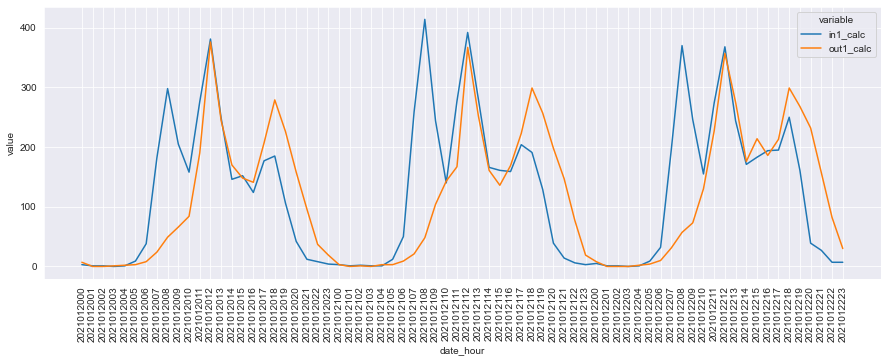

In [68]:
# 人数Count の可視化
plt.figure(figsize=(15, 5))  # Graph size 設定
plt.xticks(rotation=90)  # 横軸の Label を90度回転
sns.lineplot(x=viz_data['date_hour'], y=viz_data['value'],
             hue=viz_data['variable'])  # lineplot()で横軸に date_hour, 縦軸に value, variable を色分けして描画

- ８時、12時、18時台に山が見られる。
- ８時台は、 in1 がほとんで、12時台は in1, out1 どちらも、18時台はどちらも増えているが、out1 の方が多く出ている。

上記は、出社時、昼休憩、退社時に関係しているのではないかと想定。

## 移動平均を計算して可視化しよう
移動平均を算出し、曜日などの周期による Data の影響を極力減らし純粋な Data の増減傾向をつかむ。

In [69]:
# Data の絞り込み
viz_data = data_analytics[['date_hour', 'in1_calc', 'out1_calc']].groupby('date_hour', as_index=False).sum()  # Data を絞り込み時単位で集計
viz_data.head(10)  # 先頭５行を表示

,date_hour,in1_calc,out1_calc
0,2021012000,3.0,7.0
1,2021012001,1.0,0.0
2,2021012002,1.0,0.0
3,2021012003,0.0,1.0
4,2021012004,1.0,2.0
5,2021012005,9.0,3.0
6,2021012006,38.0,8.0
7,2021012007,182.0,24.0
8,2021012008,298.0,49.0
9,2021012009,205.0,66.0


In [70]:
# 移動平均Data の作成
viz_data_rolling = viz_data[['in1_calc', 'out1_calc']].rolling(3).mean()  # .rolling()とmean()を利用して３Data範囲の移動平均を算出
viz_data_rolling.head(10)  # 先頭５行を表示

,in1_calc,out1_calc
0,NaN,NaN
1,NaN,NaN
2,1.666667,2.333333
3,0.666667,0.333333
4,0.666667,1.000000
5,3.333333,2.000000
6,16.000000,4.333333
7,76.333333,11.666667
8,172.666667,27.000000
9,228.333333,46.333333


３時間平均をとるための Data がない為、index0, 1 は欠損している。

<AxesSubplot:xlabel='date_hour', ylabel='value'>

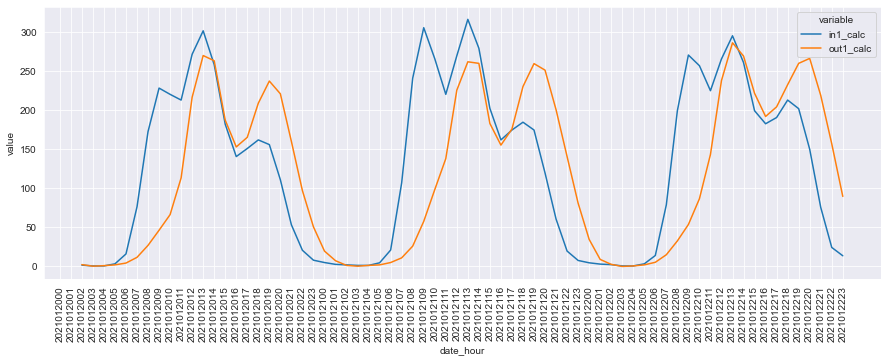

In [71]:
# 移動平均Data の可視化
viz_data_rolling['date_hour'] = viz_data['date_hour']  # date_hour列が落ちてしまっているので追加
viz_data_rolling = pd.melt(viz_data_rolling, id_vars='date_hour', value_vars=['in1_calc', 'out1_calc'])  # 縦持ちData に変換

plt.figure(figsize=(15, 5))  # Graph size の設定
plt.xticks(rotation=90)  # 横軸Label を90度回転
sns.lineplot(x=viz_data_rolling['date_hour'], y=viz_data_rolling['value'], hue=viz_data_rolling['variable'])  # in1, out1 で色分けして折れ線Graph を描画

移動平均前の Graph と比べて動きが緩やかになっている。
>一般的に、平均を取る幅を大きくすると動きが緩やかになり、より Macro な情報になる
> 大きすぎると、細かい動きは見えなくなっていくので、分析要件や見たいものに合わせて変えていく必要がある。